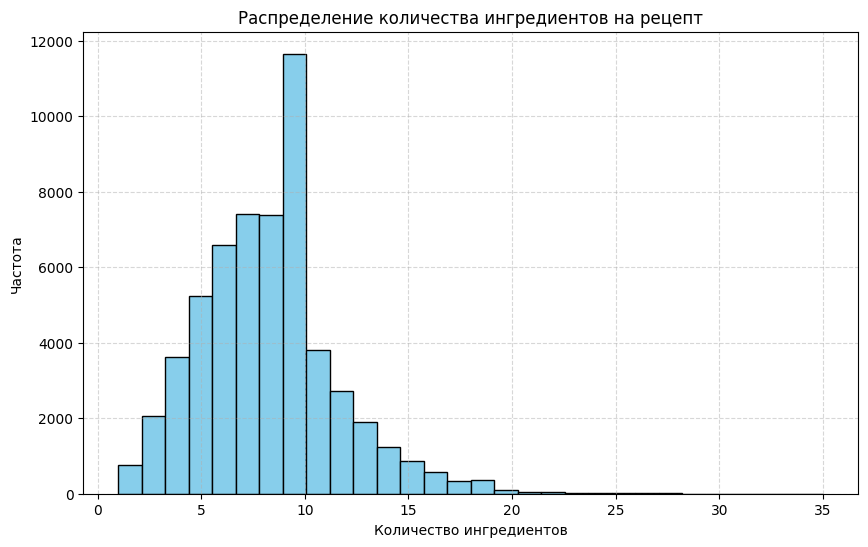

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df = pd.read_csv("List_of_Recipes.csv")

# –ü–æ–¥—Å—á—ë—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∏–Ω–≥—Ä–µ–¥–∏–µ–Ω—Ç–æ–≤ –≤ –∫–∞–∂–¥–æ–º —Ä–µ—Ü–µ–ø—Ç–µ
df['ingredients_count'] = df['nor_ingridients'].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else 0)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
plt.figure(figsize=(10, 6))
plt.hist(df['ingredients_count'], bins=30, edgecolor='black', color='skyblue')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∏–Ω–≥—Ä–µ–¥–∏–µ–Ω—Ç–æ–≤ –Ω–∞ —Ä–µ—Ü–µ–ø—Ç')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–Ω–≥—Ä–µ–¥–∏–µ–Ω—Ç–æ–≤')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

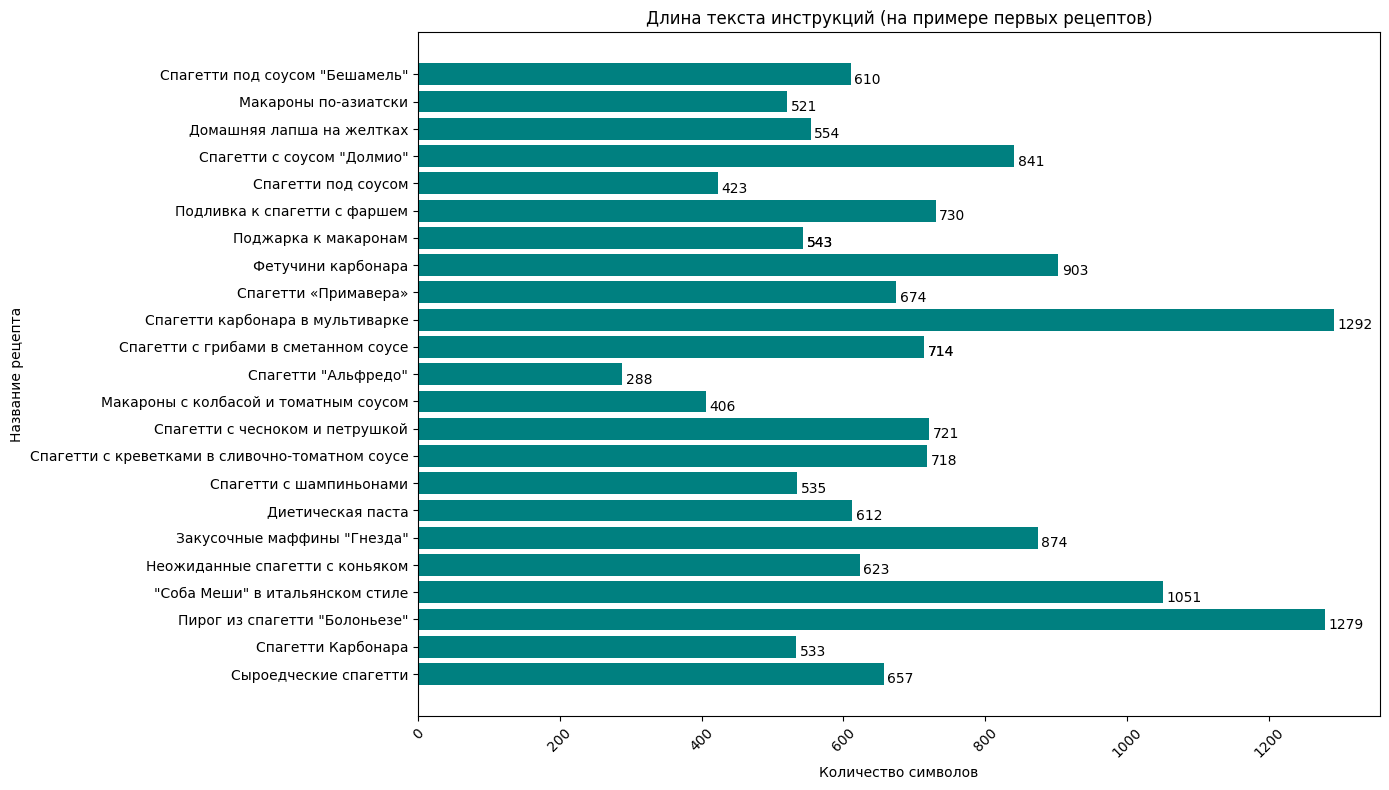

In [7]:
# –ü–æ–¥—Å—á—ë—Ç –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–∞ –∏–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏
df['instructions_length'] = df['instructions'].str.len()

# –î–ª—è —É–ø—Ä–æ—â–µ–Ω–∏—è –ø–æ—Å—Ç—Ä–æ–∏–º —Å—Ä–µ–¥–Ω—é—é –¥–ª–∏–Ω—É –ø–æ –ø–µ—Ä–≤—ã–º N –∑–∞–ø–∏—Å—è–º
top_n = 25
sample_df = df.head(top_n)

# –°—Ç–æ–ª–±—á–∞—Ç–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞
plt.figure(figsize=(14, 8))
bars = plt.barh(sample_df['name'], sample_df['instructions_length'], color='teal')
plt.title('–î–ª–∏–Ω–∞ —Ç–µ–∫—Å—Ç–∞ –∏–Ω—Å—Ç—Ä—É–∫—Ü–∏–π (–Ω–∞ –ø—Ä–∏–º–µ—Ä–µ –ø–µ—Ä–≤—ã—Ö —Ä–µ—Ü–µ–ø—Ç–æ–≤)')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–∏–º–≤–æ–ª–æ–≤')
plt.ylabel('–ù–∞–∑–≤–∞–Ω–∏–µ —Ä–µ—Ü–µ–ø—Ç–∞')
plt.xticks(rotation=45)
plt.tight_layout()

# –ü–æ–¥–ø–∏—Å—ã–≤–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞–¥ —Å—Ç–æ–ª–±—Ü–∞–º–∏
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + 0.2, f'{int(width)}', va='center')

plt.show()

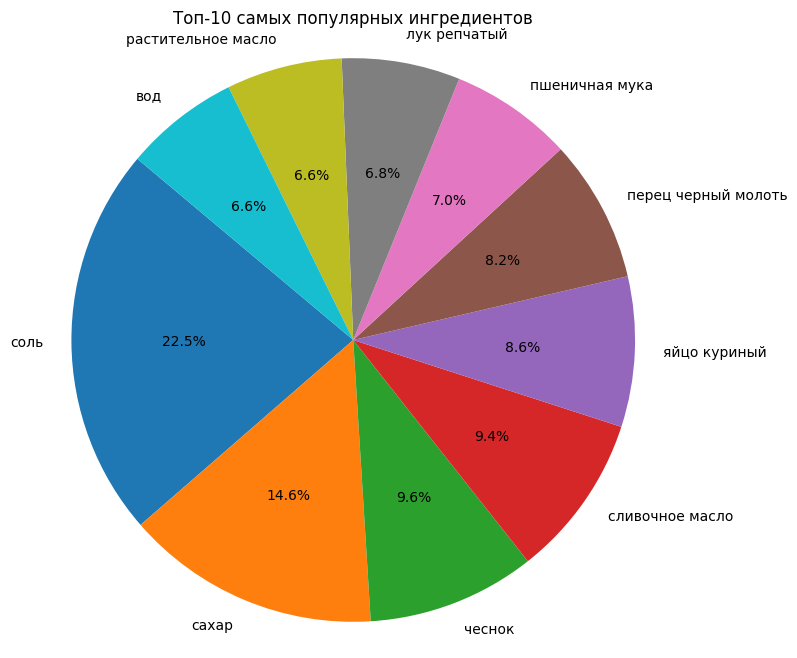

In [3]:

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è –≤—Å–µ—Ö –∏–Ω–≥—Ä–µ–¥–∏–µ–Ω—Ç–æ–≤
def extract_all_ingredients(df):
    all_ingredients = []
    for index, row in df.iterrows():
        try:
            ingredients = ast.literal_eval(row['nor_ingridients'])
            all_ingredients.extend(ingredients)
        except:
            continue
    return all_ingredients

# –ü–æ–ª—É—á–∞–µ–º —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö –∏–Ω–≥—Ä–µ–¥–∏–µ–Ω—Ç–æ–≤
all_ingredients = extract_all_ingredients(df)

# –°—á–∏—Ç–∞–µ–º —á–∞—Å—Ç–æ—Ç—É
ingredient_counts = Counter(all_ingredients)

# –û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —Ç–æ–ø-10 —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö
top_ingredients = dict(ingredient_counts.most_common(10))

# –ö—Ä—É–≥–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞
plt.figure(figsize=(8, 8))
plt.pie(top_ingredients.values(), labels=top_ingredients.keys(), autopct='%1.1f%%', startangle=140)
plt.title('–¢–æ–ø-10 —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∏–Ω–≥—Ä–µ–¥–∏–µ–Ω—Ç–æ–≤')
plt.axis('equal')  # —á—Ç–æ–±—ã –∫—Ä—É–≥ –±—ã–ª –∫—Ä—É–≥–æ–º
plt.show()

In [5]:
import pandas as pd
import ast

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df = pd.read_csv("List_of_Recipes.csv")

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–¥—Å—á—ë—Ç–∞ –∏–Ω–≥—Ä–µ–¥–∏–µ–Ω—Ç–æ–≤
def count_ingredients(row):
    try:
        ingredients = ast.literal_eval(row['nor_ingridients'])
        if isinstance(ingredients, list):
            return len(ingredients)
        else:
            return 0
    except:
        return 0

# –î–æ–±–∞–≤–ª—è–µ–º —Å—Ç–æ–ª–±–µ—Ü —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∏–Ω–≥—Ä–µ–¥–∏–µ–Ω—Ç–æ–≤
df['ingredients_count'] = df.apply(count_ingredients, axis=1)

# –°—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–µ–µ
average_ingredients = df['ingredients_count'].mean()

# –û–∫—Ä—É–≥–ª—è–µ–º –¥–æ –¥–≤—É—Ö –∑–Ω–∞–∫–æ–≤ –ø–æ—Å–ª–µ –∑–∞–ø—è—Ç–æ–π
average_ingredients_rounded = round(average_ingredients, 2)

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print(f"üìä –°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–Ω–≥—Ä–µ–¥–∏–µ–Ω—Ç–æ–≤ –Ω–∞ —Ä–µ—Ü–µ–ø—Ç: {average_ingredients_rounded}")

üìä –°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–Ω–≥—Ä–µ–¥–∏–µ–Ω—Ç–æ–≤ –Ω–∞ —Ä–µ—Ü–µ–ø—Ç: 8.2


In [6]:
import pandas as pd

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df = pd.read_csv("cleaned_recipes_inst.csv")

# –ü–æ–¥—Å—á—ë—Ç –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–∞ –≤ –∏–Ω—Å—Ç—Ä—É–∫—Ü–∏—è—Ö
df['instructions_length'] = df['instructions'].str.len()

# –°—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏
average_length = round(df['instructions_length'].mean())
min_length = df['instructions_length'].min()
max_length = df['instructions_length'].max()

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
print(f"üìè –°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Ç–µ–∫—Å—Ç–∞: {average_length} —Å–∏–º–≤–æ–ª–æ–≤")
print(f"üîª –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞: {min_length} —Å–∏–º–≤–æ–ª–æ–≤")
print(f"üî∫ –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞: {max_length} —Å–∏–º–≤–æ–ª–æ–≤")

üìè –°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Ç–µ–∫—Å—Ç–∞: 679 —Å–∏–º–≤–æ–ª–æ–≤
üîª –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞: 27 —Å–∏–º–≤–æ–ª–æ–≤
üî∫ –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞: 7494 —Å–∏–º–≤–æ–ª–æ–≤


In [8]:
# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
from sentence_transformers import SentenceTransformer
import torch

# –ó–∞–≥—Ä—É–∂–∞–µ–º –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å
print("üß† –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏...")
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

# –ü—Ä–∏–º–µ—Ä—ã —Ç–µ–∫—Å—Ç–æ–≤ (—Ä–µ—Ü–µ–ø—Ç–æ–≤)
text1 = "–°–ø–∞–≥–µ—Ç—Ç–∏ —Å –∫—Ä–µ–≤–µ—Ç–∫–∞–º–∏ –≤ —Å–ª–∏–≤–æ—á–Ω–æ–º —Å–æ—É—Å–µ"
text2 = "–ü–∞—Å—Ç–∞ —Å –º–æ—Ä–µ–ø—Ä–æ–¥—É–∫—Ç–∞–º–∏ –∏ –±–µ–ª—ã–º —Å–æ—É—Å–æ–º"
text3 = "–†–µ—Ü–µ–ø—Ç –æ–≤–æ—â–Ω–æ–≥–æ —Å—É–ø–∞ —Å –∫–∞—Ä—Ç–æ—à–∫–æ–π –∏ –º–æ—Ä–∫–æ–≤—å—é"

# –ö–æ–¥–∏—Ä—É–µ–º —Ç–µ–∫—Å—Ç—ã –≤ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏
print("\nüß¨ –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤ –≤ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏...")
embedding1 = model.encode(text1, convert_to_tensor=True)
embedding2 = model.encode(text2, convert_to_tensor=True)
embedding3 = model.encode(text3, convert_to_tensor=True)

# –í—ã–≤–æ–¥–∏–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ–± —ç–º–±–µ–¥–¥–∏–Ω–≥–∞—Ö
print(f"\nüî¢ –§–æ—Ä–º–∞ —ç–º–±–µ–¥–¥–∏–Ω–≥–∞: {embedding1.shape} (—Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å: {embedding1.shape[0]})")
print(f"üî§ –ü—Ä–∏–º–µ—Ä —ç–º–±–µ–¥–¥–∏–Ω–≥–∞ –¥–ª—è '{text1[:20]}...':")
print(embedding1[:10])  # –í—ã–≤–æ–¥–∏–º —Ç–æ–ª—å–∫–æ –ø–µ—Ä–≤—ã–µ 10 —á–∏—Å–µ–ª –¥–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏

# –í—ã—á–∏—Å–ª—è–µ–º –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ –º–µ–∂–¥—É –ø–∞—Ä–∞–º–∏ —Ç–µ–∫—Å—Ç–æ–≤
from sentence_transformers import util

similarity_12 = util.cos_sim(embedding1, embedding2).item()
similarity_13 = util.cos_sim(embedding1, embedding3).item()

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
print("\nüìà –ö–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ:")
print(f"'{text1}' vs '{text2}': {similarity_12:.4f}")
print(f"'{text1}' vs '{text3}': {similarity_13:.4f}")

if similarity_12 > similarity_13:
    print("‚úÖ –¢–µ–∫—Å—Ç 1 –±–ª–∏–∂–µ –∫ —Ç–µ–∫—Å—Ç—É 2 (–ø–æ—Ö–æ–∂–∏–µ —Ä–µ—Ü–µ–ø—Ç—ã)")
else:
    print("‚ùå –¢–µ–∫—Å—Ç 1 –±–ª–∏–∂–µ –∫ —Ç–µ–∫—Å—Ç—É 3 (–º–µ–Ω–µ–µ –ø–æ—Ö–æ–∂–∏–µ)")

c:\Users\mrcov\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


üß† –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏...

üß¨ –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤ –≤ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏...

üî¢ –§–æ—Ä–º–∞ —ç–º–±–µ–¥–¥–∏–Ω–≥–∞: torch.Size([384]) (—Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å: 384)
üî§ –ü—Ä–∏–º–µ—Ä —ç–º–±–µ–¥–¥–∏–Ω–≥–∞ –¥–ª—è '–°–ø–∞–≥–µ—Ç—Ç–∏ —Å –∫—Ä–µ–≤–µ—Ç–∫–∞–º...':
tensor([-0.0359, -0.2614,  0.1626, -0.1316,  0.0169, -0.0691, -0.0107, -0.1869,
         0.0433, -0.2623])

üìà –ö–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ:
'–°–ø–∞–≥–µ—Ç—Ç–∏ —Å –∫—Ä–µ–≤–µ—Ç–∫–∞–º–∏ –≤ —Å–ª–∏–≤–æ—á–Ω–æ–º —Å–æ—É—Å–µ' vs '–ü–∞—Å—Ç–∞ —Å –º–æ—Ä–µ–ø—Ä–æ–¥—É–∫—Ç–∞–º–∏ –∏ –±–µ–ª—ã–º —Å–æ—É—Å–æ–º': 0.7739
'–°–ø–∞–≥–µ—Ç—Ç–∏ —Å –∫—Ä–µ–≤–µ—Ç–∫–∞–º–∏ –≤ —Å–ª–∏–≤–æ—á–Ω–æ–º —Å–æ—É—Å–µ' vs '–†–µ—Ü–µ–ø—Ç –æ–≤–æ—â–Ω–æ–≥–æ —Å—É–ø–∞ —Å –∫–∞—Ä—Ç–æ—à–∫–æ–π –∏ –º–æ—Ä–∫–æ–≤—å—é': 0.6191
‚úÖ –¢–µ–∫—Å—Ç 1 –±–ª–∏–∂–µ –∫ —Ç–µ–∫—Å—Ç—É 2 (–ø–æ—Ö–æ–∂–∏–µ —Ä–µ—Ü–µ–ø—Ç—ã)
